# PyTorch for Beginners 2024

## Introduction
When machine learning with Python, you have multiple options for which library or framework to use. However, if you're moving toward deep learning, you should probably use either TensorFlow or PyTorch, the two most famous deep learning frameworks.

In this article, we'll go through a quick introduction to the PyTorch framework, going all the way from the initial concepts to the training and testing of the first image classification model.

We won't dive deep into learning complex concepts and mathematics, as this article intends to be a more hands-on approach for how to start with PyTorch as a tool, not with deep learning as a concept.

Therefore, we assume you have some intermediate Python knowledge--including classes and object-oriented programming--and you're familiar with the main concepts of deep learning.

### PyTorch
PyTorch is a powerful, yet easy-to-use deep learning library for Python, mainly used for applications such as computer vision and natural language processing.

While TensorFlow was developed by Google, PyTorch was developed by Facebook's AI Research Group, which has recently shifted management of the framework to the newly created PyTorch Foundation, which is under the supervision of the Linux Foundation.

The flexibility of PyTorch allows easy integration of new data types and algorithms, and the framework is also efficient and scalable, since it was designed to minimize the number of computations required and to be compatible with a variety of hardware architectures.

### Tensors
In deep learning, tensors are a fundamental data structure that is very similar to arrays and matrices, with which we can efficiently perform mathematical operations on large sets of data. A tensor can be represented as a matrix, but also as a vector, a scalar, or a higher-dimensional array.

To make it easier to visualize, you can think of a tensor as a simple array containing scalars or other arrays. On PyTorch, a tensor is a structure very similar to a `ndarray`, with the difference that they are <font color="red">capable of running on a GPU</font>, which dramatically speeds up the computational process.

It's simple to create a tensor from a NumPy `ndarray`:

In [1]:
import torch
import numpy as np

ndarray = np.array([0, 1, 2])
t = torch.from_numpy(ndarray)
print(t)

tensor([0, 1, 2])


A tensor on PyTorch has three attributes:

- shape: the size of the tensor
- data type: the type of data stored in the tensor
- device: the device in which the tensor is stored

If we print the attributes from the tensor we created, we'll have the following:

In [2]:
print(t.shape)
print(t.dtype)
print(t.device)

torch.Size([3])
torch.int64
cpu


This means we have a one-dimensional tensor with the size 3, containing integers stored in the CPU.

We can always instantiate a tensor from a Python list, too:

In [3]:
t = torch.tensor([0, 1, 2])
print(t)

tensor([0, 1, 2])


Tensors can also be multidimensional:

In [4]:
ndarray = np.array([[0, 1, 2], [3, 4, 5]])
t = torch.from_numpy(ndarray)
print(t)

tensor([[0, 1, 2],
        [3, 4, 5]])


It's also possible to create a tensor from another tensor. In this case, the new tensor inherits the characteristics of the initial one. The example below creates a tensor with random numbers based on the previously created tensor:

In [5]:
new_t = torch.rand_like(t, dtype=torch.float)
print(new_t)

tensor([[0.0119, 0.6121, 0.7478],
        [0.3712, 0.4346, 0.7258]])


Note that the rand_like() function creates a new tensor with shape (2, 2). However, as the function returns values from 0 to 1, we had to overwrite the data type to float.

We can also create a random tensor simply from the shape we expect it to have:

In [6]:
my_shape = (3, 3)
rand_t = torch.rand(my_shape)
print(rand_t)

tensor([[0.6515, 0.1857, 0.8237],
        [0.9940, 0.7458, 0.0879],
        [0.0711, 0.3056, 0.0090]])


## Tensor Operations
Just like in NumPy, there are multiple possible operations we can perform with tensors--like slicing, transposing, and multiplying matrices, among others.

The slicing of a tensor is done exactly like any other array structure in Python. Consider the tensor below:

In [7]:
zeros_tensor = torch.zeros((2, 3))
print(zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


We can easily index the first row or the first column:

In [8]:
print(zeros_tensor[1])
print(zeros_tensor[:, 0])

tensor([0., 0., 0.])
tensor([0., 0.])


We can also have this tensor transposed:

In [9]:
transposed = zeros_tensor.T
print(transposed)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


Finally, we can multiply the tensors:

In [10]:
ones_tensor = torch.ones(3, 3)
product = torch.matmul(zeros_tensor, ones_tensor)
print(product)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


Notice that we used the zeros and ones function to create a tensor containing only zeros and ones with the shape we passed.

These operations are just a fraction of what PyTorch can do. However, the purpose of this article is not to cover each of them, but to give a general idea of how they work. If you want to learn more, PyTorch has a complete documentation.

## Loading Data
PyTorch comes with a built-in module that provides ready-to-use datasets for many deep learning applications, such as computer vision, speech recognition, and natural language processing. This means that it's possible to build your own neural network without the need to collect and process data yourself.

As an example, we'll download the MNIST dataset. The MNIST is a dataset of images of handwritten digits, containing 60 thousand samples and a test set of 10 thousand images.

We'll use the `datasets` module from `torchvision` to download the data:

In [ ]:
!pip install torchvision matplotlib

In [15]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

You will have to wait for a bit for the downloading from internet finishes.

Inside the downloading function, we have the following parameters:

- __root__: the directory where the data will be saved. You can pass a string with the directory's path. A dot (as seen in the example) will save the files in the same directory you're in.

- __train__: used to inform PyTorch whether you're downloading the train or test set.

- __download__: whether to download the data if it's already unavailable at the path you specified.

- __transform__: to transform the data. In our code, we select tensor.

If we print the first element of the train set, we'll see the following:

In [16]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

The above tensor is just a small part of the entire element, as it would be too big to display.

This bunch of numbers may not mean anything to us, and since they represent images, we can use matplotlib to visualize them as actual images:

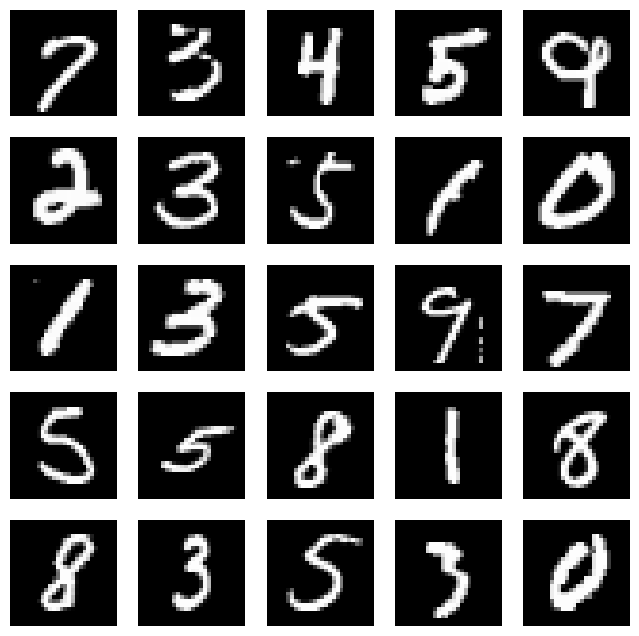

In [17]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

We can also use the classes attribute to see the classes inside the data:

In [18]:
training_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

When the model is trained, it can receive new inputs, then classify as one of these classes.

Now that we have downloaded the data, we'll use the DataLoader. This enables us to iterate over the dataset in mini-batches instead of one observation at a time, and to shuffle the data while training the models. Here's the code:

In [21]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

## Neural Networks
In deep learning, a neural network is a type of algorithm used to model data with complex patterns. A neural network attempts to simulate the functioning of the human brain through multiple layers connected by processing nodes, which behave like human neurons. These layers connected by nodes create a complex net that is able to process and understand huge amounts of complex data.

In PyTorch, everything related to neural networks is built using the <font color="red">torch.nn</font> module. The network itself is written as a class that inherits from <font color="red">nn.Module</font>, and, inside the class, we'll use <font color="red">nn</font> to build the layers. The following is a simple implementation taken from the PyTorch [documentation](https://pytorch.org/tutorials/):

In [23]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Although it's out of the scope of this article to go deep into what the layers are, how they work, and how to implement them, let's take a quick dive into what the above code does.

- The `nn.Flaten` is responsible for transforming the data from multidimensional to one dimension only.

- The `nn.Sequential` container creates a sequence of layers inside the network.

- Inside the container, we have layers. Each type of layer transforms the data in a different way, and there are numerous ways to implement the layers in a neural network.

- The forward function is the function called when the model is executed; however, we should not call it directly.

The following line instantiates our model:

In [24]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Training the Neural Network
Now that we have defined our neural network, we can put it to use. Before starting the training, we should first set a loss function. The loss function measures how far our model is from the correct results, and it's what we'll try to minimize during the training of the network. Cross-entropy is a common loss function used for classification tasks, and it's the one we'll use. We should initialize the function:

In [25]:
loss_function = nn.CrossEntropyLoss()

One last step before training is to set an optimization algorithm. Such an algorithm will be in charge of adjusting the model during the training process in order to minimize the error measured by the loss function we chose above. A common choice for this kind of task is the stochastic gradient descent algorithm. PyTorch, however, has several other possibilities that you can become familiar with [here](https://pytorch.org/docs/stable/optim.html). Below is the code:

In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

The `lr` parameter is the learning rate, which represents the speed at which the model's parameters will be updated during each iteration in training.

Finally, it's time to train and test the network. For each of these tasks, we'll implement a function. The train function consists of looping through the data one batch at a time, using the optimizer to adjust the model, and computing the prediction and the loss. This is PyTorch's standard implementation:

In [29]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Notice that for each iteration, we get the data to feed the model, but also keep track of the number of the batch so we can print the loss and the current batch every 100 iterations.

And then we have the test function, which computes the accuracy and the loss, this time using the test set:

In [30]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We then set the number of epochs to train our model. An epoch consists of an iteration over the dataset. For instance, if we set `epochs=5`, it means we'll go through the entire dataset 5 times with the neural network training and testing. The more we train, the better the results.

This is PyTorch's implementation and the output of such a loop:

In [31]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305296  [   64/60000]
loss: 2.305291  [  128/60000]
loss: 2.296259  [  192/60000]
loss: 2.293485  [  256/60000]
loss: 2.298343  [  320/60000]
loss: 2.306224  [  384/60000]
loss: 2.290694  [  448/60000]
loss: 2.305690  [  512/60000]
loss: 2.306690  [  576/60000]
loss: 2.299942  [  640/60000]
loss: 2.293857  [  704/60000]
loss: 2.298441  [  768/60000]
loss: 2.303237  [  832/60000]
loss: 2.298211  [  896/60000]
loss: 2.298782  [  960/60000]
loss: 2.302055  [ 1024/60000]
loss: 2.298678  [ 1088/60000]
loss: 2.308218  [ 1152/60000]
loss: 2.299593  [ 1216/60000]
loss: 2.297101  [ 1280/60000]
loss: 2.298998  [ 1344/60000]
loss: 2.288437  [ 1408/60000]
loss: 2.295787  [ 1472/60000]
loss: 2.296215  [ 1536/60000]
loss: 2.300532  [ 1600/60000]
loss: 2.299108  [ 1664/60000]
loss: 2.287365  [ 1728/60000]
loss: 2.302085  [ 1792/60000]
loss: 2.298737  [ 1856/60000]
loss: 2.298136  [ 1920/60000]
loss: 2.301948  [ 1984/60000]
loss: 2.293937  [ 2048/60000]


Notice that in each epoch, we print the loss function at every 100 batches in the training loop, and it keeps getting lower. Also, after each epoch, we can see the accuracy getting higher as the average loss decreases.

If we had set more epochs--let's say 10, 50, or even 100--chances are we'd see even better results, but the outputs would be much longer and much harder to visualize and understand.

With our model finally trained, it's easy to save it and load it when necessary:

In [32]:
torch.save(model, "model.pth")
model = torch.load("model.pth")

/tmp/ipykernel_76089/3215243966.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("model.pth")


## Conclusion
In this article, we covered the basics of using PyTorch for deep learning, including:

- Tensors and how to use them
- How to load and prepare the data
- Neural networks and how to define them on PyTorch
- How to train your first image classification model
- Saving and loading models on PyTorch